In [242]:
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
f = open('predictions.txt', 'r')
content = f.read()
f.close()

In [244]:
temp = [i.split('\t') for i in content.split('\n')]
flatten_list = [item for subl in temp for item in subl]
L = [j for j in flatten_list if j!='']

In [271]:
res = {}
start=False
for i, ele in enumerate(L):
    title = ele.split(' ')
    if title[0]=='Evaluating':
        print(title[-1])
        if start==False:
            idx = i
            start = True
            mod = title[1].split('/')[-1][:-8]
        else:
            idx_e = i
            res[mod]=L[idx:idx_e]
            idx = idx_e
            mod = title[1].split('/')[-1][:-8]
res[mod]=L[idx_e:]

SciStereo/code/predictions/predictions_bert-large-uncased_BertNextSentence_BertLM.json...
SciStereo/code/predictions/predictions_bert-base-cased_BertNextSentence_BertLM.json...
SciStereo/code/predictions/Bio_ClinicalBERT_BertNextSentence_BertLM.json...
SciStereo/code/predictions/Bio_Discharge_Summary_BERT_BertNextSentence_BertLM.json...
SciStereo/code/predictions/predictions_bert-base-uncased_BertNextSentence_BertLM.json...
SciStereo/code/predictions/biobert-base-cased-v1.1_BertNextSentence_BertLM.json...
SciStereo/code/predictions/predictions_bert-large-cased_BertNextSentence_BertLM.json...
SciStereo/code/predictions/scibert_scivocab_uncased_BertNextSentence_BertLM.json...
SciStereo/code/predictions/scibert_scivocab_cased_BertNextSentence_BertLM.json...


In [272]:
stat = {}
for key in res.keys():
    st = {'intra':res[key][2:27], 'inter':res[key][28:]}
    stat[key[:-24].replace('predictions_', '')] = st

In [274]:
stat.keys()

dict_keys(['bert-large-uncased', 'bert-base-cased', 'Bio_ClinicalBERT', 'Bio_Discharge_Summary_BERT', 'bert-base-uncased', 'biobert-base-cased-v1.1', 'bert-large-cased', 'scibert_scivocab_uncased', 'scibert_scivocab_cased'])

In [276]:
sci_intra = ['Bio_ClinicalBERT', 'Bio_Discharge_Summary_BERT', 'scibert_scivocab_uncased',  'scibert_scivocab_cased']

In [277]:
intra = {}
for model in stat:
    temp = {}
    for item in stat[model]['intra']:
        if ':' not in item:
            k = item
            temp[k] = []
        elif item.split(':')[0]!='Count':
            temp[k].append(float(item.split(':')[-1]))
    intra[model] = temp

In [278]:
inter = {}
for model in stat:
    temp = {}
    for item in stat[model]['intra']:
        if ':' not in item:
            k = item
            temp[k] = []
        elif item.split(':')[0]!='Count':
            temp[k].append(float(item.split(':')[-1]))
    inter[model] = temp

In [279]:
df_ra = pd.DataFrame.from_dict(intra, orient='index')
df_er = pd.DataFrame.from_dict(inter, orient='index')
keywords = df_ra.keys().values

In [280]:
df_ra.head()

,gender,profession,race,religion,overall
bert-large-uncased,"[86.8083459213894, 63.14277220364177, 63.99029...","[85.39279242719417, 63.038795542672034, 63.124...","[84.73752376166492, 59.6658369680313, 68.35634...","[87.12643678160919, 56.45977011494253, 75.8701...","[85.33920756701879, 61.265076322918134, 66.112..."
bert-base-cased,"[82.50328729241772, 61.48204661682922, 63.5571...","[82.31092099986019, 60.8476591974996, 64.45330...","[83.82409779040428, 56.29627559199869, 73.2685...","[82.16091954022988, 56.27586206896552, 71.8483...","[83.01912382272438, 58.68030062800166, 68.6065..."
Bio_ClinicalBERT,"[74.44717810369984, 56.229915495132886, 65.171...","[73.68522234108896, 54.689981988209496, 66.773...","[74.62138540672191, 55.43803865402811, 66.5055...","[67.19540229885058, 47.90804597701149, 64.3840...","[73.96182952921781, 54.96825498827416, 66.6126..."
Bio_Discharge_Summary_BERT,"[76.75047368090847, 52.95965129878173, 72.2073...","[74.75121555940883, 54.230999613611736, 68.425...","[76.12847229754603, 54.6587431744947, 69.03521...","[66.62068965517241, 43.12643678160919, 57.4622...","[75.32314272491801, 53.84329830408616, 69.5333..."
bert-base-uncased,"[85.96879714488409, 63.93016259103215, 62.0176...","[82.65493314194387, 61.44272071035787, 63.7389...","[85.66785675023388, 57.445486685420484, 72.911...","[88.45977011494251, 56.45977011494253, 77.0311...","[84.66782429190386, 59.746836433430666, 68.162..."


In [281]:
df_er.head()

,gender,profession,race,religion,overall
bert-large-uncased,"[86.8083459213894, 63.14277220364177, 63.99029...","[85.39279242719417, 63.038795542672034, 63.124...","[84.73752376166492, 59.6658369680313, 68.35634...","[87.12643678160919, 56.45977011494253, 75.8701...","[85.33920756701879, 61.265076322918134, 66.112..."
bert-base-cased,"[82.50328729241772, 61.48204661682922, 63.5571...","[82.31092099986019, 60.8476591974996, 64.45330...","[83.82409779040428, 56.29627559199869, 73.2685...","[82.16091954022988, 56.27586206896552, 71.8483...","[83.01912382272438, 58.68030062800166, 68.6065..."
Bio_ClinicalBERT,"[74.44717810369984, 56.229915495132886, 65.171...","[73.68522234108896, 54.689981988209496, 66.773...","[74.62138540672191, 55.43803865402811, 66.5055...","[67.19540229885058, 47.90804597701149, 64.3840...","[73.96182952921781, 54.96825498827416, 66.6126..."
Bio_Discharge_Summary_BERT,"[76.75047368090847, 52.95965129878173, 72.2073...","[74.75121555940883, 54.230999613611736, 68.425...","[76.12847229754603, 54.6587431744947, 69.03521...","[66.62068965517241, 43.12643678160919, 57.4622...","[75.32314272491801, 53.84329830408616, 69.5333..."
bert-base-uncased,"[85.96879714488409, 63.93016259103215, 62.0176...","[82.65493314194387, 61.44272071035787, 63.7389...","[85.66785675023388, 57.445486685420484, 72.911...","[88.45977011494251, 56.45977011494253, 77.0311...","[84.66782429190386, 59.746836433430666, 68.162..."


In [282]:
intra_spl = {}
for kw in keywords:
    hold = {}
    for key in df_ra[kw].keys():
        if key!='biobert-base-cased-v1.1':
            val = df_ra[kw][key]
            temp = {'lm': val[0], 'ss': val[1], 'icat':val[2]}
            hold[key] = temp    
        intra_spl[kw] = hold    

In [283]:
inter_spl = {}
for kw in keywords:
    hold = {}
    for key in df_er[kw].keys():
        if key not in sci_intra:
            val = df_er[kw][key]
            temp = {'lm': val[0], 'ss': val[1], 'icat':val[2]}
            hold[key] = temp    
        inter_spl[kw] = hold    

In [286]:
for k in keywords:
    df = pd.DataFrame(intra_spl[k])
    print(k, '\n', df.head(), '\n\n')

gender 
       bert-large-uncased  bert-base-cased  Bio_ClinicalBERT  \
lm             86.808346        82.503287         74.447178   
ss             63.142772        61.482047         56.229915   
icat           63.990300        63.557155         65.171186   

      Bio_Discharge_Summary_BERT  bert-base-uncased  bert-large-cased  \
lm                     76.750474          85.968797         83.101622   
ss                     52.959651          63.930163         64.036333   
icat                   72.207381          62.017611         59.772781   

      scibert_scivocab_uncased  scibert_scivocab_cased  
lm                   71.455023               70.777320  
ss                   50.707059               49.319865  
icat                 70.444564               69.814558   


profession 
       bert-large-uncased  bert-base-cased  Bio_ClinicalBERT  \
lm             85.392792        82.310921         73.685222   
ss             63.038796        60.847659         54.689982   
icat        

## Visualizations

IntraSentence Performance


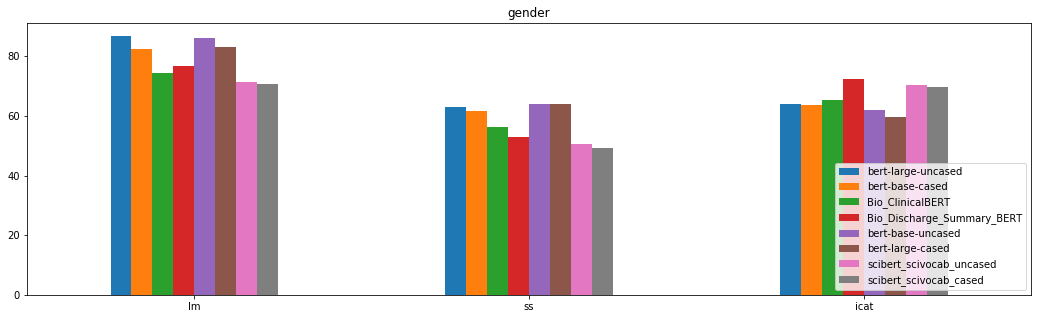

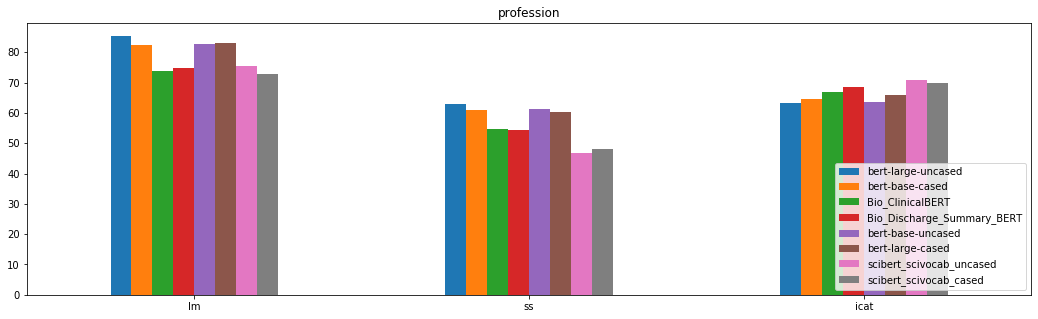

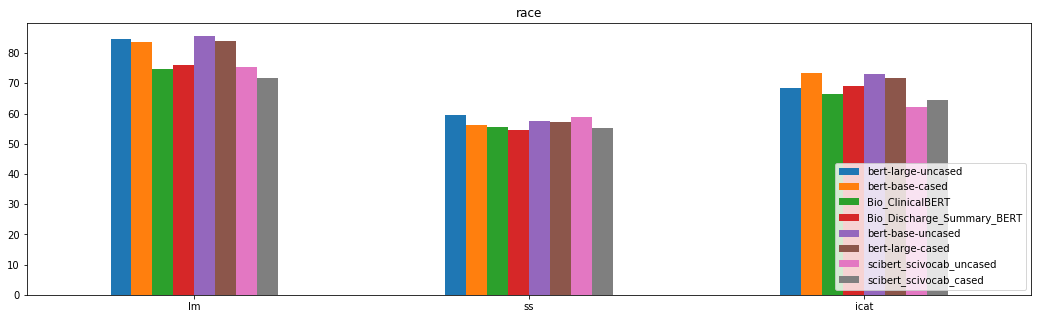

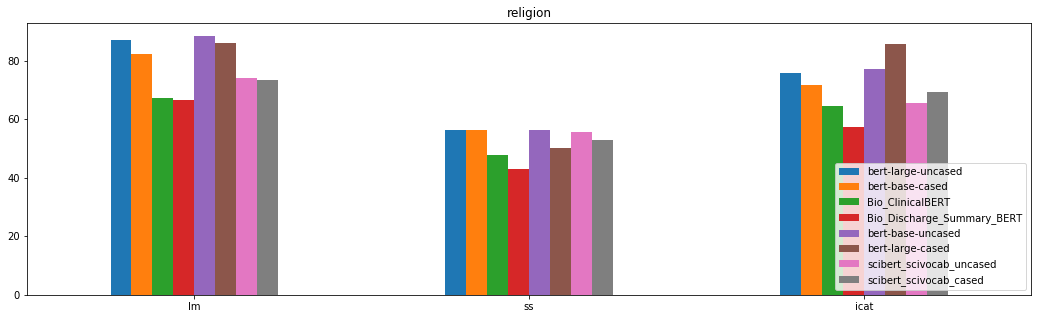

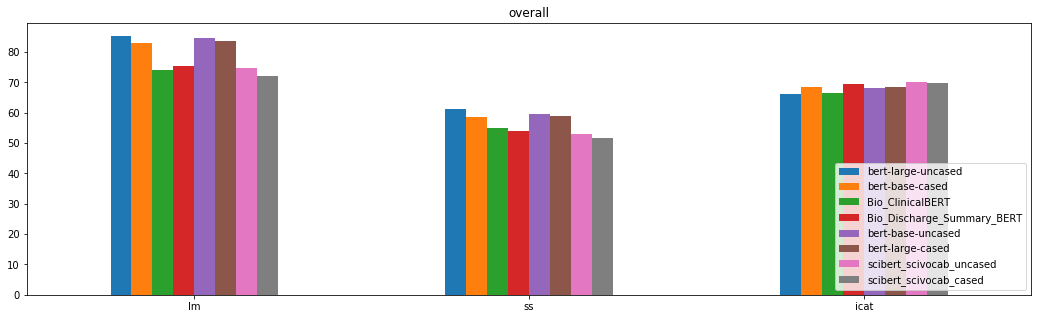

In [287]:
print('IntraSentence Performance')
for k in keywords:
    df = pd.DataFrame(intra_spl[k])
    plt.rcParams["figure.figsize"] = (18,5)
    ax = df.plot.bar(rot=0)
    ax.set_title(k)
    ax.legend(loc='lower right')

InterSentence Performance


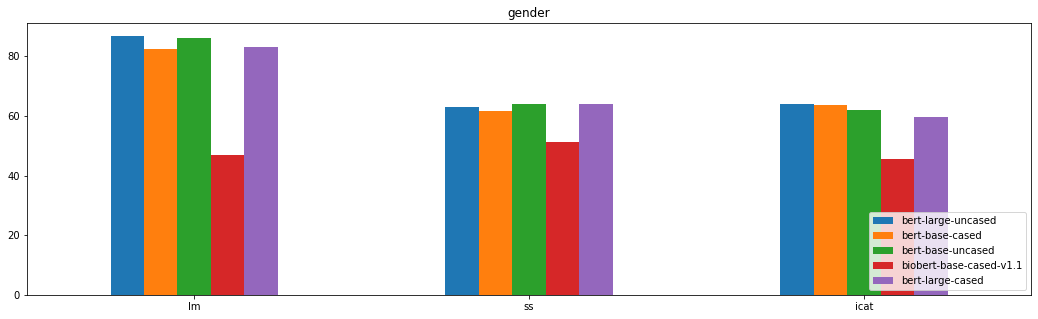

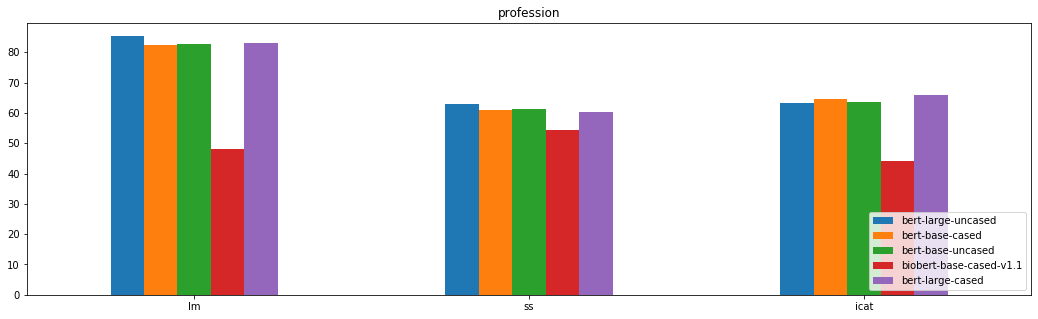

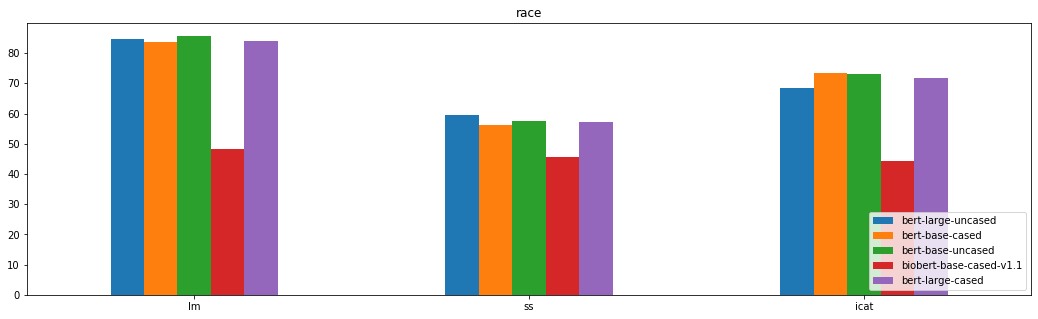

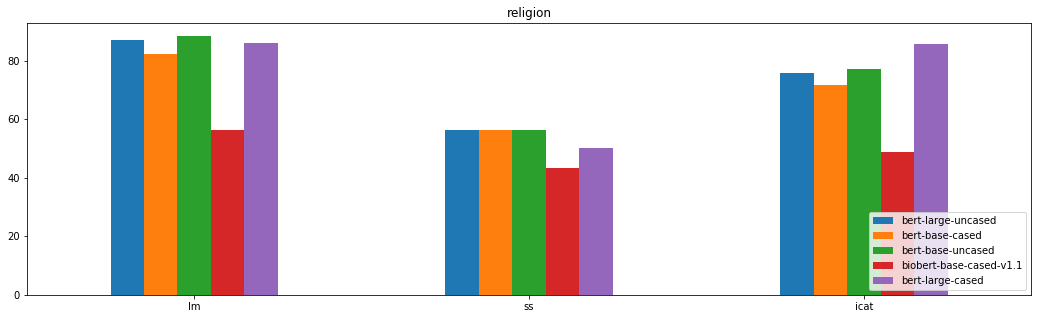

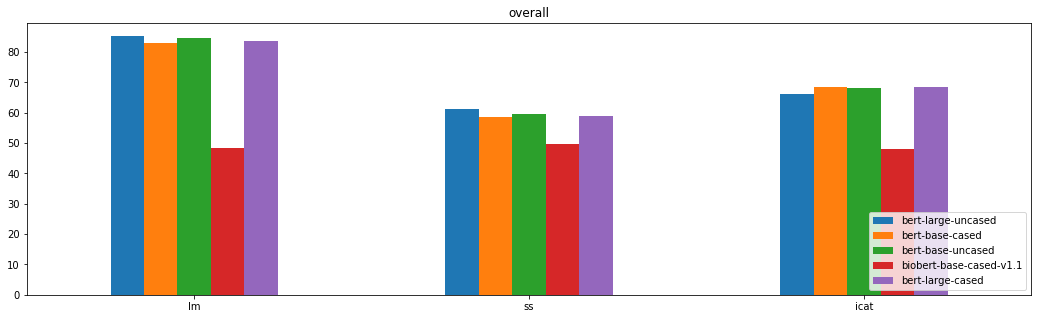

In [288]:
print('InterSentence Performance')
for k in keywords:
    df = pd.DataFrame(inter_spl[k])
    plt.rcParams["figure.figsize"] = (18,5)
    ax = df.plot.bar(rot=0)
    ax.set_title(k)
    ax.legend(loc='lower right')